# **Import Data Frame**

In [ ]:
import pandas as pd
# read the Data Frame
df_container_traffic = pd.read_csv('/content/Container port traffic.csv', skiprows=4)
df_gdp_growth = pd.read_csv('/content/GDP Growth.csv', skiprows=4)
df_electric_power = pd.read_csv('/content/Electric power consumption.csv', skiprows=4)


# **Preprocessing the Data Frame**

In [6]:

def clean_and_melt(df, value_name):
    df = df[['Country Name', 'Country Code'] + [str(year) for year in range(1990, 2024)]]
    df = df.melt(id_vars=["Country Name", "Country Code"], var_name="Year", value_name=value_name)
    df["Year"] = pd.to_numeric(df["Year"])
    df = df[df['Country Name'].isin(['China', 'India', 'United States', 'Germany', 'France'])]
    return df

# Apply the cleaning function to each DataFrame
df_gdp_long = clean_and_melt(df_gdp_growth, "GDP Growth")
df_electric_power_long = clean_and_melt(df_electric_power, "Electric Power Consumption")
df_container_traffic_long = clean_and_melt(df_container_traffic, "Container Port Traffic")

# Merge the data frames on 'Country Code' and 'Year'
df_merged_new = df_gdp_long.merge(df_electric_power_long, on=['Country Name', 'Country Code', 'Year'])
df_merged_new = df_merged_new.merge(df_container_traffic_long, on=['Country Name', 'Country Code', 'Year'])

df_merged_new


,Country Name,Country Code,Year,GDP Growth,Electric Power Consumption,Container Port Traffic
0,China,CHN,1990,3.920251,510.619855,NaN
1,Germany,DEU,1990,5.255006,6639.731691,NaN
2,France,FRA,1990,2.923935,5988.660360,NaN
3,India,IND,1990,5.533455,272.946647,NaN
4,United States,USA,1990,1.885965,11713.331704,NaN
...,...,...,...,...,...,...
165,China,CHN,2023,NaN,NaN,NaN
166,Germany,DEU,2023,NaN,NaN,NaN
167,France,FRA,2023,NaN,NaN,NaN
168,India,IND,2023,NaN,NaN,NaN


# **Exploratry Data Analysis**

# **Time Series Plot**

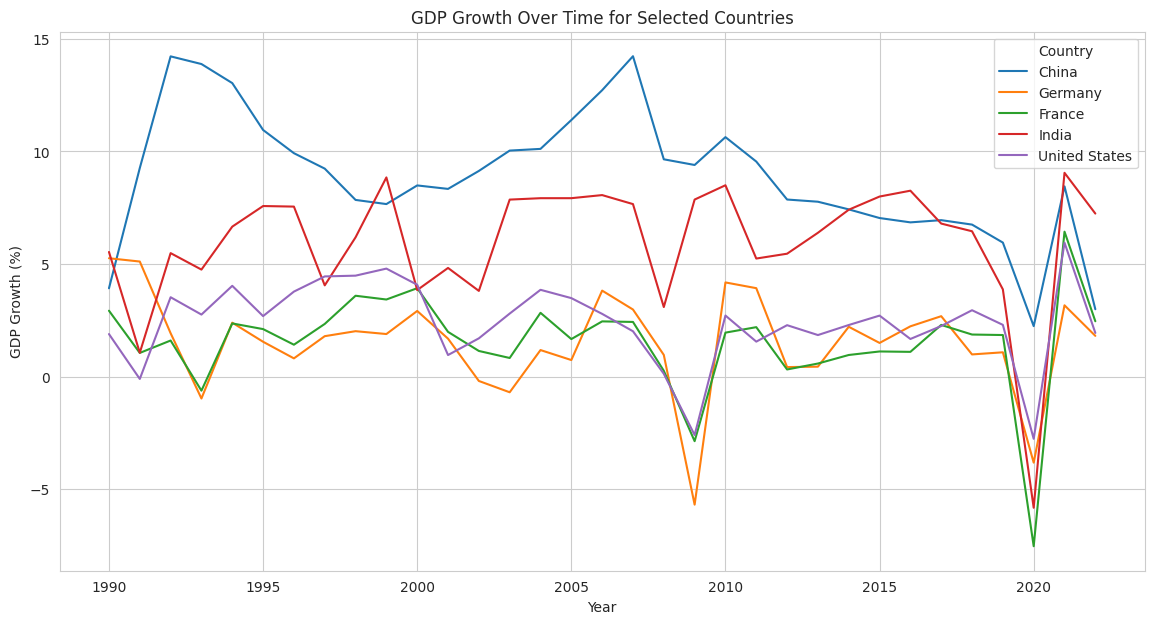

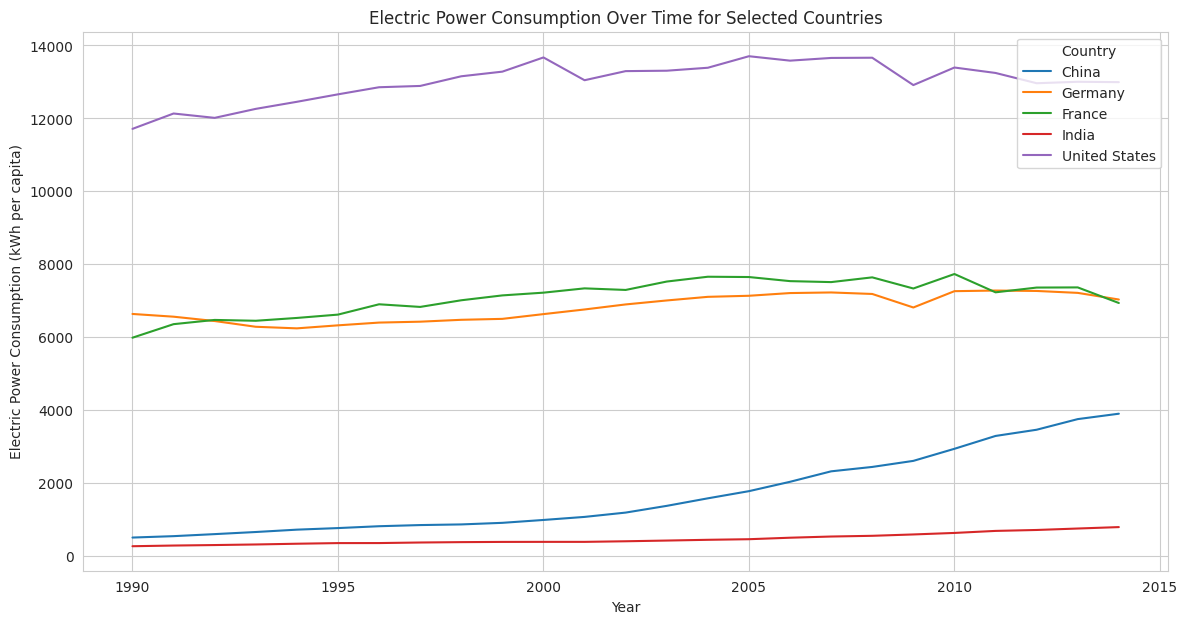

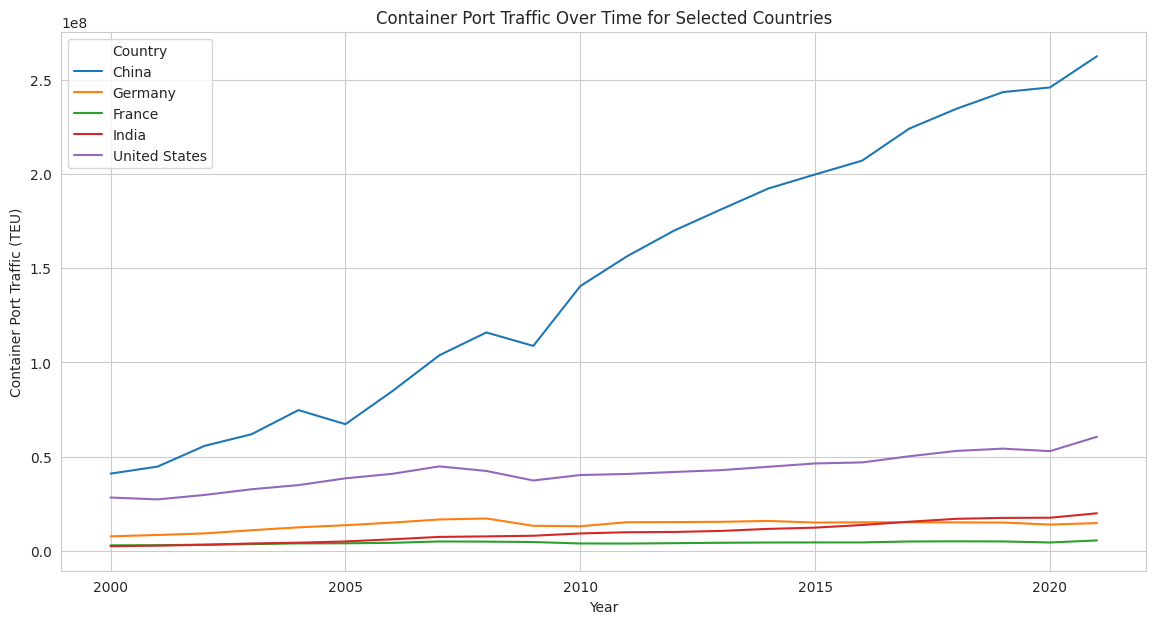

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to create line plots
def plot_time_series(data, x, y, title, hue, ylabel):
    """
    Plots a time series line chart.

    Parameters:
    - data: DataFrame containing the data to plot.
    - x: str, name of the DataFrame column to be used as x-axis.
    - y: str, name of the DataFrame column to be used as y-axis.
    - title: str, title of the plot.
    - hue: str, name of the DataFrame column to differentiate the lines.
    - ylabel: str, label for the y-axis.
    """
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=data, x=x, y=y, hue=hue)
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel(ylabel)
    plt.legend(title='Country')
    plt.show()

# Usage of the function for GDP Growth Over Time
plot_time_series(df_merged_new, 'Year', 'GDP Growth', 'GDP Growth Over Time for Selected Countries', 'Country Name', 'GDP Growth (%)')

# Usage of the function for Electric Power Consumption Over Time
plot_time_series(df_merged_new, 'Year', 'Electric Power Consumption', 'Electric Power Consumption Over Time for Selected Countries', 'Country Name', 'Electric Power Consumption (kWh per capita)')

# Usage of the function for Container Port Traffic Over Time
plot_time_series(df_merged_new, 'Year', 'Container Port Traffic', 'Container Port Traffic Over Time for Selected Countries', 'Country Name', 'Container Port Traffic (TEU)')


# **Pie Chart**

In [8]:
# Calculate average GDP Growth for pie chart
avg_gdp_growth = df_merged_new.groupby('Country Name')['GDP Growth'].mean()


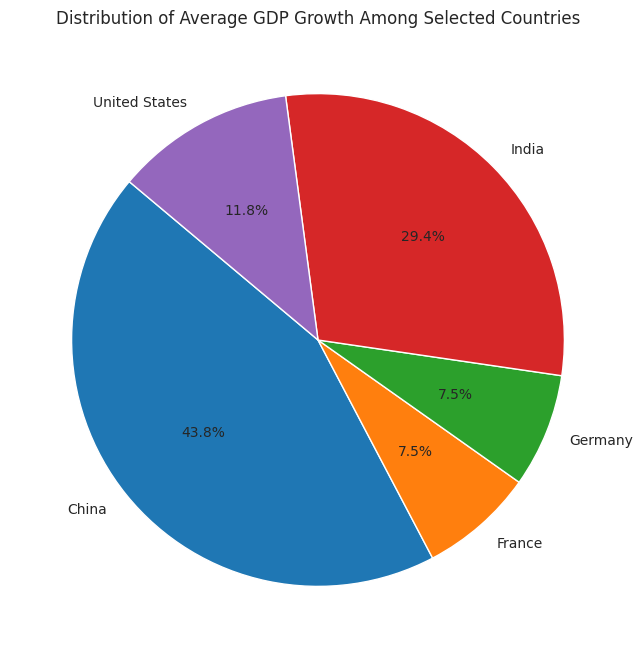

In [9]:
# Pie Chart for Average GDP Growth
plt.figure(figsize=(8, 8))
plt.pie(avg_gdp_growth, labels=avg_gdp_growth.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Average GDP Growth Among Selected Countries')
plt.show()


In [12]:
# Calculate total Container Port Traffic
total_container_traffic = df_merged_new.groupby('Country Name')['Container Port Traffic'].sum()
# Calculate total Electric Power Consumption
total_electric_power = df_merged_new.groupby('Country Name')['Electric Power Consumption'].sum()

In [13]:
# Combine total electric power consumption and total container port traffic into one DataFrame
combined_totals = pd.DataFrame({
    'Total Electric Power Consumption (kWh)': total_electric_power,
    'Total Container Port Traffic (TEU)': total_container_traffic
}).reset_index()

combined_totals

,Country Name,Total Electric Power Consumption (kWh),Total Container Port Traffic (TEU)
0,China,42086.342674,3.217331e+09
1,France,177703.150854,9.399364e+07
2,Germany,170398.216913,3.034787e+08
3,India,11739.908512,2.157281e+08
4,United States,325254.851310,9.316261e+08
